In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)# mang 3d
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
series.shape,X_train.shape,y_train.shape

((10000, 51, 1), (7000, 50, 1), (7000, 1))

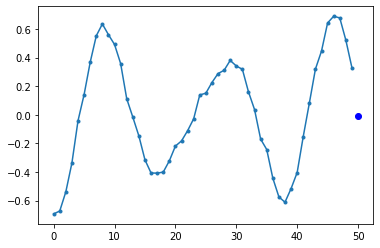

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_valid[2, :, 0], ".-")
plt.plot(n_steps, y_valid[2, 0], "bo", label="Target")

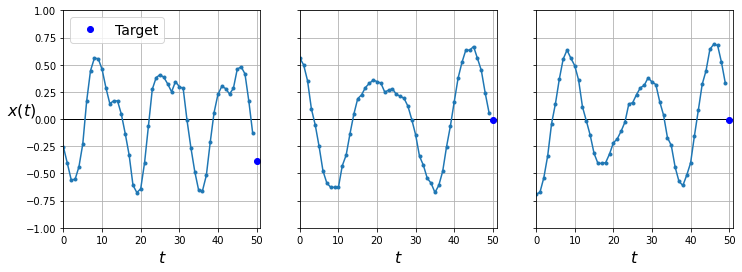

In [ ]:
import matplotlib.pyplot as plt
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()


In [ ]:
y_pred = X_valid[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred))

0.020136384

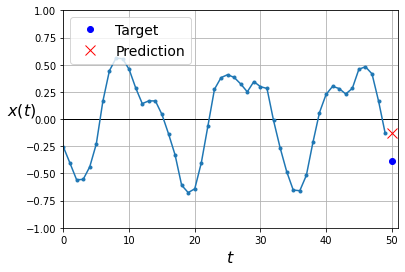

In [ ]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1030 - val_loss: 0.0548
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0401 - val_loss: 0.0277
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0162
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0118
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0101
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0062

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0041


0.004112536087632179

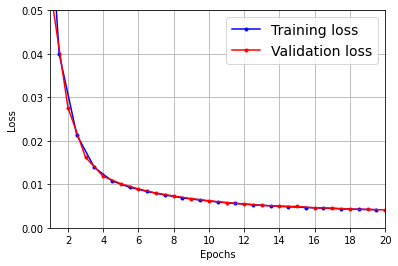

In [ ]:
import matplotlib as mpl
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

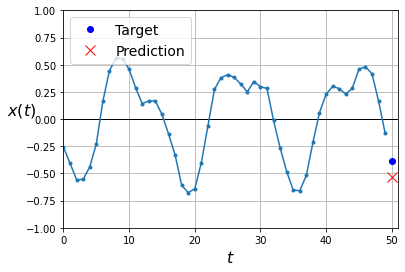

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.0980 - val_loss: 0.0471
Epoch 2/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0371 - val_loss: 0.0287
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0251 - val_loss: 0.0213
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0195 - val_loss: 0.0173
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0163 - val_loss: 0.0149
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0143 - val_loss: 0.0133
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0121 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0113 - val_loss: 0.01

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0109


0.010921929962933064

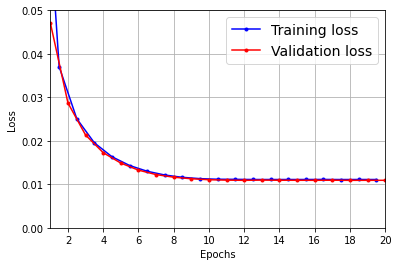

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

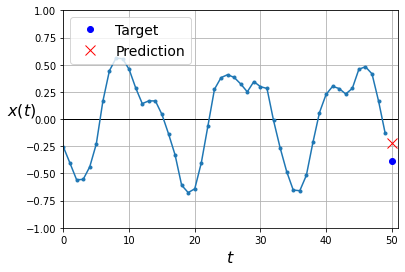

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 6s 20ms/step - loss: 0.0505 - val_loss: 0.0090
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0069 - val_loss: 0.0073
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 6/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 7/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0035 - val_lo

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0030


0.00302363489754498

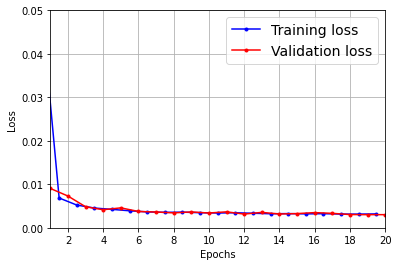

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

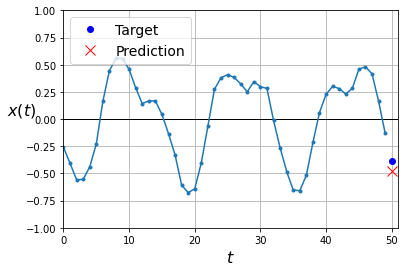

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.0226 - val_loss: 0.0053
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 5/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 7/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 10/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0030 - val_lo

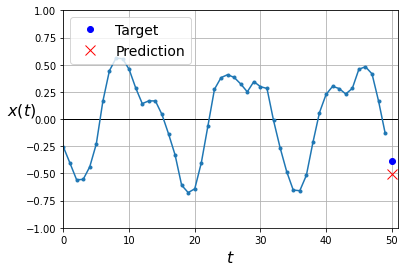

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

In [ ]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

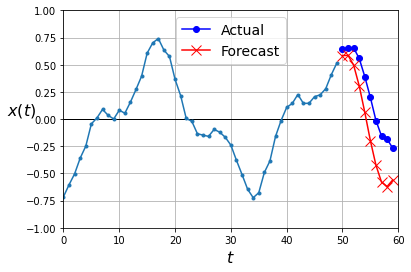

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [ ]:
np.mean(tf.keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.04202069

In [ ]:
Y_naive_pred = np.tile(X_valid[:, -1], 10) # take the last time step value, and repeat it 10 times
np.mean(tf.keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.25697407

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1202 - val_loss: 0.0634
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0521 - val_loss: 0.0443
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.0360
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0337 - val_loss: 0.0312
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0281
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0262
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0255 - val_loss: 0.0246
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0243 - val_loss: 0.0235
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0228
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0221

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.0591 - val_loss: 0.0336
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0304 - val_loss: 0.0250
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0216 - val_loss: 0.0171
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0156 - val_loss: 0.0141
Epoch 5/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0130 - val_loss: 0.0115
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0124 - val_loss: 0.0108
Epoch 7/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0111 - val_loss: 0.0105
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0108 - val_loss: 0.0094
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0100 - val_loss: 0.0110
Epoch 10/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0099 - val_lo

In [ ]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

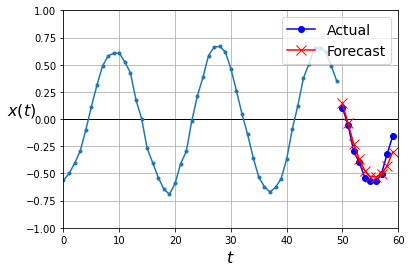

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [47]:
import numpy as np
import tensorflow as tf
n_inputs = 4
n_neurons = 6
n_timesteps = 2
## Data 
X_batch = np.array([
        [[0, 1, 2, 5], [9, 8, 7, 4]], # Batch 1
        [[3, 4, 5, 2], [0, 0, 0, 0]], # Batch 2
        [[6, 7, 8, 5], [6, 5, 4, 2]], # Batch 3
    ])

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
def create_ts(start = '2001', n = 201, freq = 'M'):
    rng = pd.date_range(start=start, periods=n, freq=freq)
    ts = pd.Series(np.random.uniform(-18, 18, size=len(rng)), rng).cumsum()
    return ts
ts= create_ts(start = '2001', n = 192, freq = 'M')
ts.tail(5)


2016-08-31    104.622358
2016-09-30     96.710852
2016-10-31    103.360552
2016-11-30    109.488916
2016-12-31    106.163291
Freq: M, dtype: float64

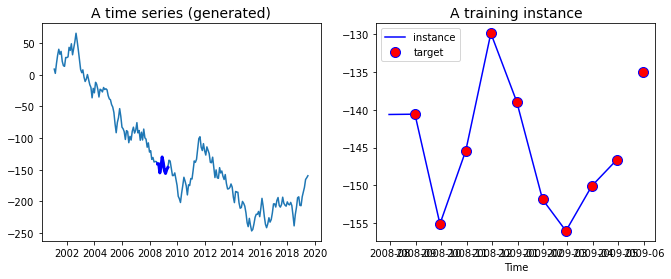

In [54]:
ts = create_ts(start = '2001', n = 222)

# Left
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(ts.index, ts)
plt.plot(ts.index[90:100], ts[90:100], "b-", linewidth=3, label="A training instance")
plt.title("A time series (generated)", fontsize=14)

# Right
plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(ts.index[90:100], ts[90:100], "b-", markersize=8, label="instance")
plt.plot(ts.index[91:101], ts[91:101], "bo", markersize=10, label="target", markerfacecolor='red')
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()


In [55]:
series = np.array(ts)
n_windows = 20   
n_input =  1
n_output = 1
size_train = 201

In [57]:
train = series[:size_train]
test = series[size_train:]
print(train.shape, test.shape)


(201,) (21,)


In [61]:
x_data = train[:size_train-1]
X_batches = x_data.reshape(-1, n_windows, n_input)
def create_batches(df, windows, input, output):
    ## Create X         
        x_data = train[:size_train-1] # Select the data
        X_batches = x_data.reshape(-1, windows, input)  # Reshape the data 
    ## Create y
        y_data = train[n_output:size_train]
        y_batches = y_data.reshape(-1, windows, output)
        return X_batches, y_batches

In [62]:
X_batches, y_batches = create_batches(df = train,
                                      windows = n_windows,
                                      input = n_input,
                                      output = n_output)

In [63]:
print(X_batches.shape, y_batches.shape)

(10, 20, 1) (10, 20, 1)


In [64]:
X_test, y_test = create_batches(df = test, windows = 20,input = 1, output = 1)
print(X_test.shape, y_test.shape)

(10, 20, 1) (10, 20, 1)


In [65]:
tf.placeholder(tf.float32, [None, n_windows, n_input])

<tf.Tensor 'Placeholder_3:0' shape=(?, 20, 1) dtype=float32>

In [66]:
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

In [69]:
basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=120, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:459: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  shape=[input_depth + self._num_units, self._num_units])


ValueError: ignored